In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re

warnings.filterwarnings('ignore')

In [2]:
titanic_train_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\train.csv')
titanic_test_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\test.csv')

In [3]:
train_df = titanic_train_df.copy()
test_df = titanic_test_df.copy()

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.shape

(891, 12)

In [9]:
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df['Initial'] = train_df['Name'].str.extract('([A-Za-z]+)\.')
test_df['Initial'] = test_df['Name'].str.extract('([A-Za-z]+)\.')

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
train_df['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Lady          1
Don           1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Countess      1
Name: Initial, dtype: int64

In [14]:
pd.crosstab(train_df['Sex'], train_df['Initial'])

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
old_initial = ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona']
new_initial = ['Miss','Miss','Miss','Other','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr']

train_df['Initial'] = train_df['Initial'].replace(old_initial, new_initial, inplace=False)
test_df['Initial'] = test_df['Initial'].replace(old_initial, new_initial, inplace=False)

In [16]:
pd.crosstab(train_df['Initial'], train_df['Sex']).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
train_df['Age'].value_counts().sort_values(ascending=False).reset_index()[:40]

,index,Age
0,24.0,30
1,22.0,27
2,18.0,26
3,19.0,25
4,30.0,25
5,28.0,25
6,21.0,24
7,25.0,23
8,36.0,22
9,29.0,20


In [20]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [22]:
train_df.groupby(['Initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,454.674330,0.159004,2.396552,32.601737,0.289272,0.153257,24.614917
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,556.312500,0.250000,1.500000,44.333333,0.312500,0.062500,32.256512


In [23]:
for ini in train_df['Initial'].unique():
    ini_age_na_index = train_df['Age'][(train_df['Age'].isnull() == True) & (train_df['Initial'] == ini)].index
    ini_age_mean = train_df['Age'][train_df['Initial'] == ini].mean()
    train_df['Age'].iloc[ini_age_na_index] = train_df['Age'].iloc[ini_age_na_index].fillna(ini_age_mean,
                                                                                           inplace=False)

In [24]:
for ini in train_df['Initial'].unique():
    ini_age_na_index = test_df['Age'][(test_df['Age'].isnull() == True) & (test_df['Initial'] == ini)].index
    ini_age_mean = train_df['Age'][train_df['Initial'] == ini].mean()
    test_df['Age'].iloc[ini_age_na_index] = test_df['Age'].iloc[ini_age_na_index].fillna(ini_age_mean,
                                                                                         inplace=False)

In [25]:
def age_cat(age):
    if age < 5: return "baby"
    elif age < 15: return "kid"
    elif age < 20: return "fresh-adult"
    elif age < 50: return "adult"
    elif age <= 80: return "old-adult"

In [26]:
train_df['Age_cat'] = train_df['Age'].apply(lambda x : age_cat(x))
test_df['Age_cat'] = test_df['Age'].apply(lambda x : age_cat(x))

In [27]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
Age_cat          0
dtype: int64

In [28]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Initial          0
Age_cat          0
dtype: int64

In [29]:
train_df[train_df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,old-adult


In [30]:
embark_na_index = train_df[train_df['Embarked'].isnull() == True].index

In [31]:
train_df = train_df.drop(index=embark_na_index, axis=0, inplace=False)

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
Age_cat          0
dtype: int64

In [33]:
train_df[train_df['Age_cat'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat


In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult


In [35]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Initial          0
Age_cat          0
dtype: int64

In [37]:
test_df[test_df['Fare'].isnull()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,old-adult


In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult


In [39]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0


In [41]:
drop_col = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_df = train_df.drop(drop_col, axis=1, inplace=False)
test_df = test_df.drop(drop_col, axis=1, inplace=False)


In [42]:
train_df.head()

,Survived,Pclass,Sex,Initial,Age_cat,FamilySize
0,0,3,male,Mr,adult,1
1,1,1,female,Mrs,adult,1
2,1,3,female,Miss,adult,0
3,1,1,female,Mrs,adult,1
4,0,3,male,Mr,adult,0


In [43]:
train_df = pd.get_dummies(train_df, ['Sex', 'Initial', 'Age_cat'])
test_df = pd.get_dummies(test_df, ['Sex', 'Initial', 'Age_cat'])

In [44]:
train_df.head()

,Survived,Pclass,FamilySize,Sex_female,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other,Age_cat_adult,Age_cat_baby,Age_cat_fresh-adult,Age_cat_kid,Age_cat_old-adult
0,0,3,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0
2,1,3,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0
4,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0


In [45]:
print(train_df.shape)
print(test_df.shape)

(889, 15)
(418, 14)


In [46]:
train_df.head()

,Survived,Pclass,FamilySize,Sex_female,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other,Age_cat_adult,Age_cat_baby,Age_cat_fresh-adult,Age_cat_kid,Age_cat_old-adult
0,0,3,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0
2,1,3,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0
4,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0


In [47]:
X_feature = train_df.drop('Survived', axis=1)
y_target = train_df['Survived']

In [48]:
X_feature.head()

,Pclass,FamilySize,Sex_female,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other,Age_cat_adult,Age_cat_baby,Age_cat_fresh-adult,Age_cat_kid,Age_cat_old-adult
0,3,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1,1,1,0,0,0,0,1,0,1,0,0,0,0
2,3,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1,1,1,0,0,0,0,1,0,1,0,0,0,0
4,3,0,0,1,0,0,1,0,0,1,0,0,0,0


In [49]:
y_target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=0)

In [52]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

In [53]:
lgbm_xgboost = LGBMClassifier(n_estimators=500, max_depth=5)
lgbm_xgboost.fit(X_train, y_train)
lgbm_pred = lgbm_xgboost.predict(X_test)

In [54]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [55]:
print('로지스틱 회귀 정확도 : {0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('lightGBM 정확도 : {0:.3f}'.format(accuracy_score(y_test, lgbm_pred)))
print('랜덤포레스트 정확도 : {0:.3f}'.format(accuracy_score(y_test, rf_pred)))

로지스틱 회귀 정확도 : 0.758
lightGBM 정확도 : 0.736
랜덤포레스트 정확도 : 0.747


In [56]:
rf_clf.feature_importances_

array([0.17441895, 0.18595784, 0.09020544, 0.15496655, 0.01622998,
       0.07030462, 0.1907837 , 0.04331919, 0.00752232, 0.01412422,
       0.02344848, 0.01019775, 0.00829446, 0.01022649])

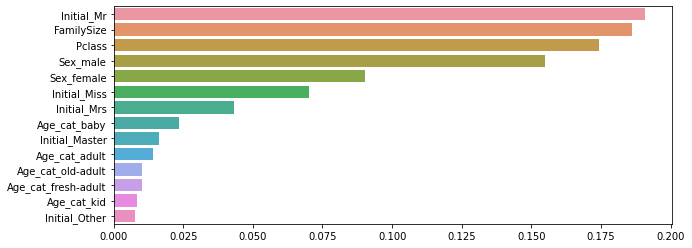

In [57]:
rf_ind = rf_clf.feature_importances_.argsort()[::-1]
plt.figure(figsize=(10, 4))
sns.barplot(y=X_feature.columns[rf_ind], x=rf_clf.feature_importances_[rf_ind])

In [58]:
imp_series = pd.Series(rf_clf.feature_importances_, index=X_feature.columns)

In [59]:
imp_series

Pclass                 0.174419
FamilySize             0.185958
Sex_female             0.090205
Sex_male               0.154967
Initial_Master         0.016230
Initial_Miss           0.070305
Initial_Mr             0.190784
Initial_Mrs            0.043319
Initial_Other          0.007522
Age_cat_adult          0.014124
Age_cat_baby           0.023448
Age_cat_fresh-adult    0.010198
Age_cat_kid            0.008294
Age_cat_old-adult      0.010226
dtype: float64

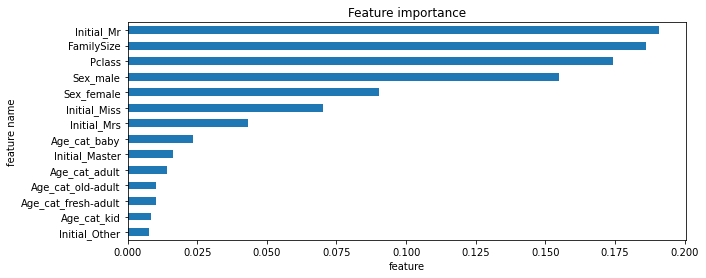

In [60]:
plt.figure(figsize=(10, 4))
imp_series.sort_values(ascending=True).plot.barh()
plt.title('Feature importance')
plt.ylabel('feature name')
plt.xlabel('feature')
plt.show()

In [61]:
train_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\train.csv')
test_df = pd.read_csv(r'..\999_동영상 연습예제\1장\titanic\test.csv')

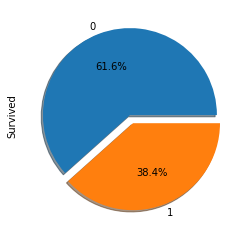

In [62]:
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)

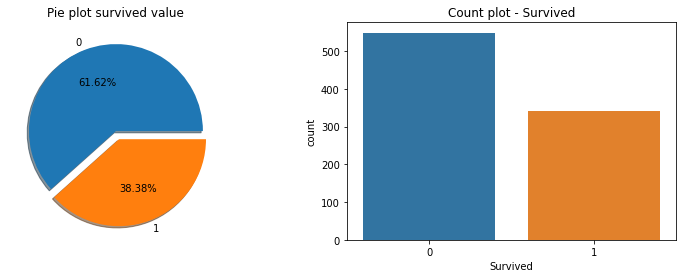

In [63]:
f, ax = plt.subplots(1,2, figsize=(13, 4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], shadow=True, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Pie plot survived value')
ax[0].set_ylabel('')
sns.countplot(data=train_df, x='Survived', ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [64]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [65]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [66]:
pd.crosstab(index=train_df['Pclass'], columns=train_df['Survived'],
            margins=all).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


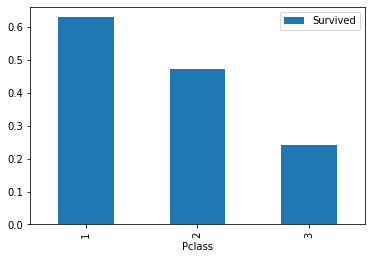

In [67]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values('Survived',
                                                                                      ascending=False).plot.bar()

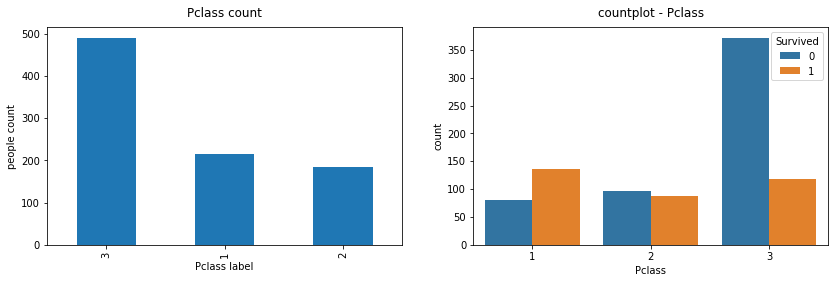

In [68]:
y_position = 1.02
f, ax = plt.subplots(1,2 , figsize=(14,4))
train_df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Pclass count', y=y_position)
ax[0].set_ylabel('people count')
ax[0].set_xlabel('Pclass label')

sns.countplot(data=train_df, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('countplot - Pclass', y=y_position)


plt.show()

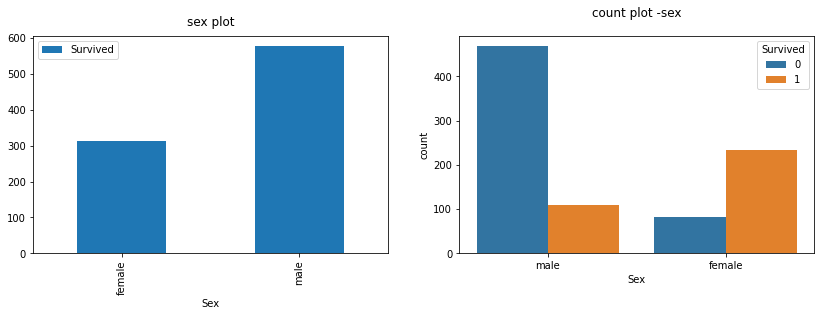

In [69]:
f, ax = plt.subplots(1,2, figsize=(14, 4))
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).count().plot.bar(ax=ax[0])
ax[0].set_title('sex plot', y=1.02)
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('count plot -sex', y=1.06)
plt.show()

In [70]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [71]:
pd.crosstab(index=train_df['Sex'], columns = train_df['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


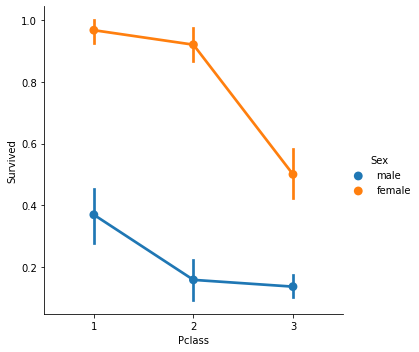

In [76]:
sns.factorplot(data = train_df, x='Pclass', hue='Sex', y='Survived')

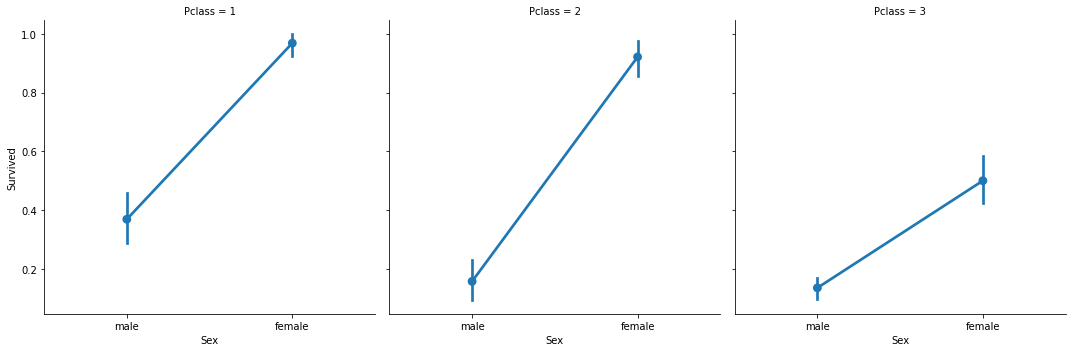

In [79]:
sns.factorplot(data=train_df, x='Sex', y='Survived', col='Pclass')

In [101]:
print('나이가 제일 많은 승객의 나이 :{0:.1f}'.format(train_df['Age'].max()))
print('나이가 제일 어린 승객의 나이 :{0:.1f}'.format(train_df['Age'].min()))
print('승객의 평균 나이:{0:.1f}, 승객의 중간값 나이:{1:.1f}'.format(train_df['Age'].mean(),
                                                     train_df['Age'].median()))

나이가 제일 많은 승객의 나이 :80.0
나이가 제일 어린 승객의 나이 :0.4
승객의 평균 나이:29.7, 승객의 중간값 나이:28.0


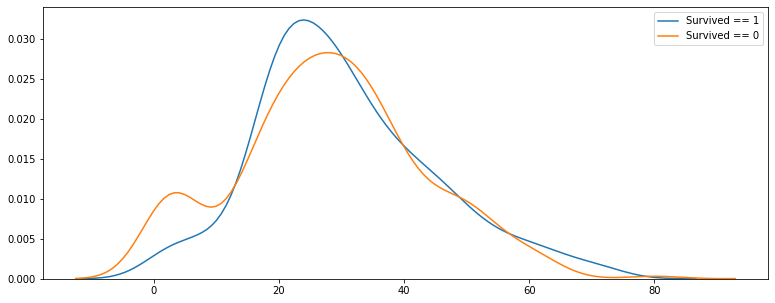

In [111]:
plt.figure(figsize=(13,5))
sns.kdeplot(train_df[train_df['Survived']==0]['Age'])
sns.kdeplot(train_df[train_df['Survived']==1]['Age'])
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

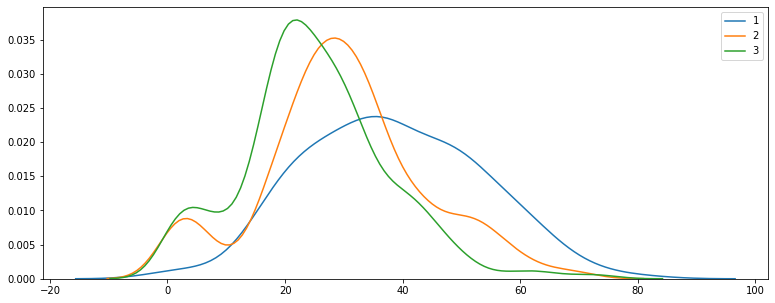

In [124]:
plt.figure(figsize=(13,5))
sns.kdeplot(train_df['Age'][train_df['Pclass']==1])
sns.kdeplot(train_df['Age'][train_df['Pclass']==2])
sns.kdeplot(train_df['Age'][train_df['Pclass']==3])
plt.legend(['1','2','3'])


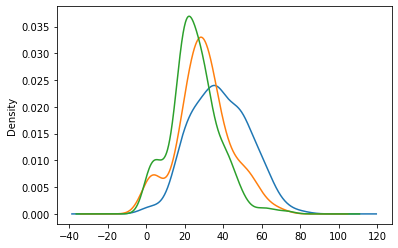

In [126]:
train_df['Age'][train_df['Pclass']==1].plot(kind='kde')
train_df['Age'][train_df['Pclass']==2].plot(kind='kde')
train_df['Age'][train_df['Pclass']==3].plot(kind='kde')

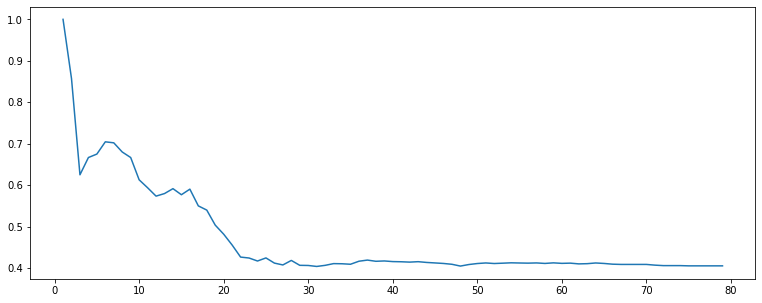

In [130]:
cummulate_survival_ratio = []
for i in range(0,80):
    cummulate_survival_ratio.append(train_df[train_df['Age']<i]['Survived']
                                    .sum() / len(train_df[train_df['Age']<i]['Survived']))
    
plt.figure(figsize=(13,5))
plt.plot(cummulate_survival_ratio)

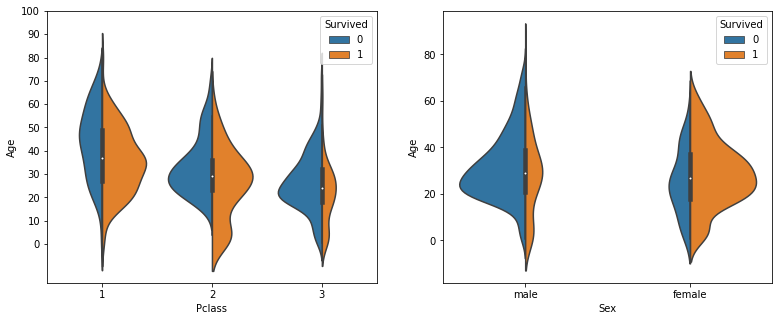

In [167]:
f, ax = plt.subplots(1,2, figsize=(13, 5))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_df, split=True, scale='count', ax=ax[0])
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, scale='count', ax=ax[1])
plt.show()

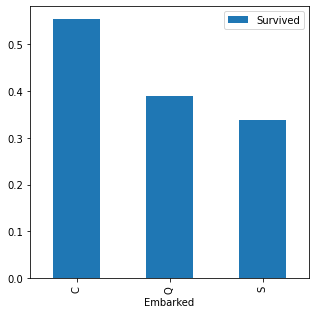

In [174]:
f, ax = plt.subplots(1,1,figsize=(5,5))
train_df[['Survived', 'Embarked']].groupby(['Embarked']).mean().sort_values()plot.bar(ax=ax)

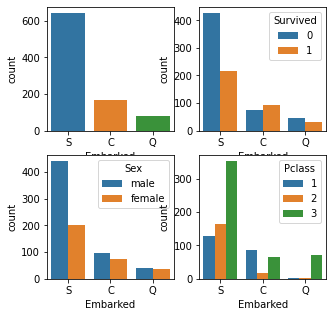

In [181]:
f, ax = plt.subplots(2,2, figsize=(5,5))
sns.countplot('Embarked', data=train_df, ax=ax[0,0])
sns.countplot('Embarked', data=train_df, hue='Survived', ax=ax[0,1])
sns.countplot('Embarked', data=train_df, hue='Sex', ax=ax[1,0])
sns.countplot('Embarked', data=train_df, hue='Pclass', ax=ax[1,1])

In [182]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

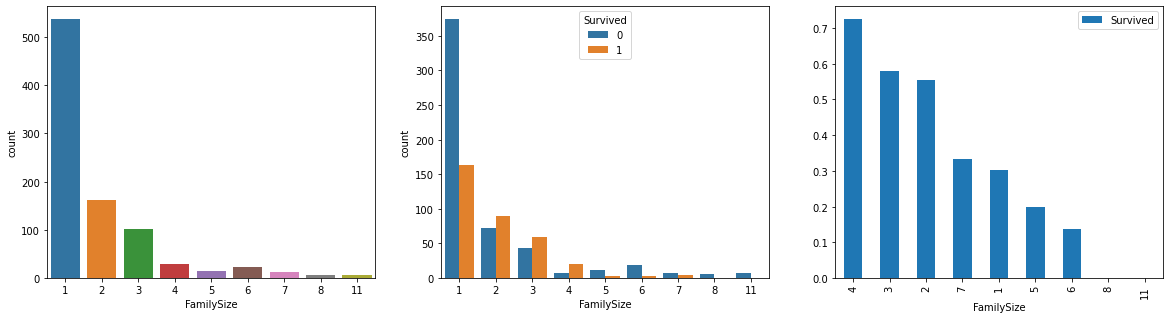

In [190]:
f, ax = plt.subplots(1,3, figsize=(20,5))
sns.countplot('FamilySize', data=train_df, ax=ax[0])
sns.countplot('FamilySize', hue='Survived', data=train_df, ax=ax[1])
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'],
                                             as_index=True).mean().sort_values('Survived', ascending=False).plot.bar(ax=ax[2])

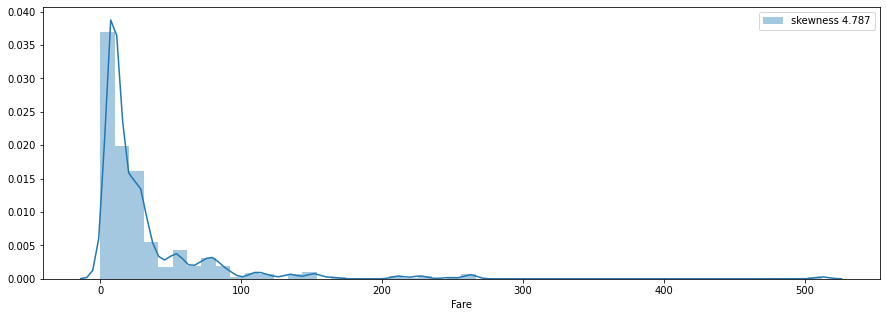

In [206]:
f, ax = plt.subplots(1,1,figsize=(15, 5))
g = sns.distplot(train_df['Fare'], ax=ax, label="skewness {:.3f}".format(train_df['Fare'].skew()))
g = g.legend(loc='best')
plt.show()